The goal of this notebook is to replicate the process done during the FastAI cource to perform image recognition.  We will be evaluating whether or not we can train a model to detect if an image of a maze has been distorted to some effect. 

In [15]:
from fastcore.all import *
import os
from fastai.vision.all import *

In [16]:
path = os.path.relpath(f"/kaggle/input/grids-and-mazes/data/")
files = os.listdir(path)

In [17]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))

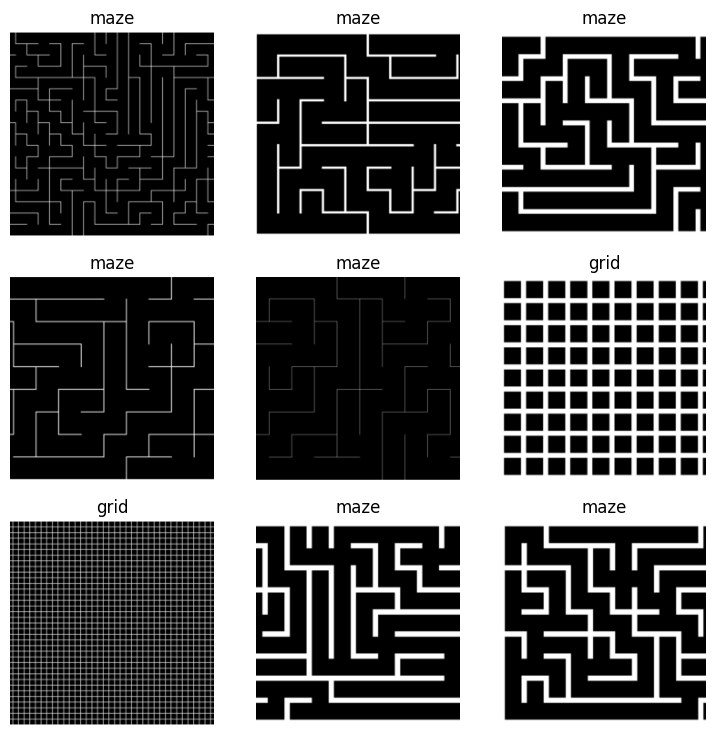

In [18]:
dls.show_batch()

In [19]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 87.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.149045,0.311905,0.128571,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.751903,0.622963,0.300000,01:58
1,0.668358,0.619393,0.257143,01:57
2,0.553209,0.237780,0.128571,01:56


In [20]:
!pip install ipywidgets

In [21]:
!jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [22]:
import ipywidgets as widgets

In [23]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [27]:
img = PILImage.create(uploader.data[0])
identification,_,probs = learn.predict(img)

print(f"This identifies as a {identification}.")
print(f"Probability it is a Maze: {probs[1].item():.6f}")

This identifies as a grid.
Probability it is a Maze: 0.000000
